# Overfitting Model
The model is too complex and adapts perfectly on the training images but performs poorly on the test data.

The learning curve of the overfitting model will show that the accuracy on the training set is high and improving over time, while the accuracy on the validation set is lower and plateauing or even decreasing over time.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


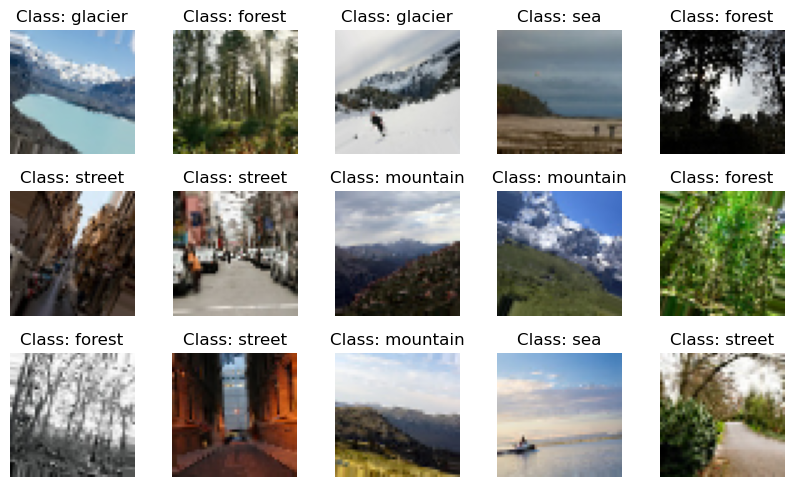

In [2]:
%run rueegg_wissiak_data_augmentation.ipynb

## Building the Model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, (3,3), input_shape= (img_size,img_size,3), activation = 'relu', padding = 'same')) #padding = same size output
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same')) 
model.add(MaxPooling2D())

model.add(Conv2D(256, (3,3), activation = 'relu', padding = 'same')) 
model.add(MaxPooling2D())

model.add(Conv2D(512, (3,3), activation = 'relu', padding = 'same')) 
model.add(MaxPooling2D())

model.add(Conv2D(512, (3,3), activation = 'relu', padding = 'same')) 
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(6, activation = 'softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

2023-03-01 15:49:59.201297: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 8)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 8)                 9

## Training the Model

In [7]:
history = model.fit(train_generator, validation_data=test_generator, epochs=15)

Epoch 1/15
439/439 [==============================] - 16s 36ms/step - loss: 0.9434 - accuracy: 0.6278 - val_loss: 0.9165 - val_accuracy: 0.6467
Epoch 2/15
439/439 [==============================] - 16s 36ms/step - loss: 0.9342 - accuracy: 0.6384 - val_loss: 0.9281 - val_accuracy: 0.6370
Epoch 3/15
439/439 [==============================] - 15s 35ms/step - loss: 0.8956 - accuracy: 0.6578 - val_loss: 0.9253 - val_accuracy: 0.6533
Epoch 4/15
439/439 [==============================] - 15s 35ms/step - loss: 0.8930 - accuracy: 0.6570 - val_loss: 0.8978 - val_accuracy: 0.6687
Epoch 5/15
439/439 [==============================] - 16s 37ms/step - loss: 0.8744 - accuracy: 0.6645 - val_loss: 0.8625 - val_accuracy: 0.6633
Epoch 6/15
439/439 [==============================] - 20s 46ms/step - loss: 0.8694 - accuracy: 0.6650 - val_loss: 0.8870 - val_accuracy: 0.6687
Epoch 7/15
439/439 [==============================] - 20s 45ms/step - loss: 0.8530 - accuracy: 0.6711 - val_loss: 0.8784 - val_accuracy:

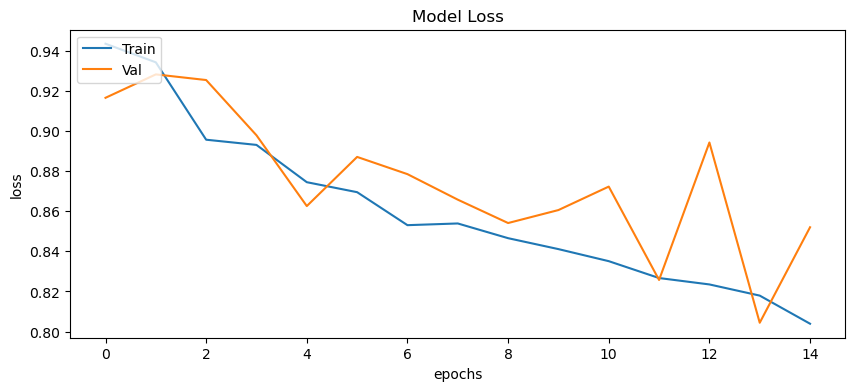

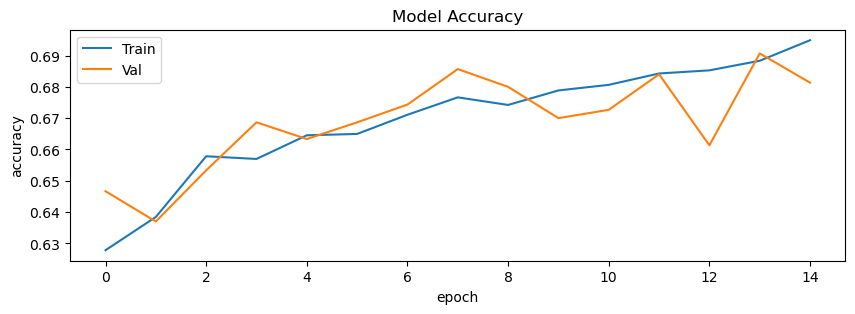

In [8]:
%run rueegg_wissiak_model_visualization.ipynb

In [9]:
%run rueegg_wissiak_model_evaluation.ipynb

94/94 [==============================] - 1s 13ms/step
Predicted classes: [0 5 0 ... 4 0 1]
True labels: [0 0 0 ... 5 5 5]
Accuracy:
 0.6813333333333333
